In [13]:
#imports
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import re
#week 3
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#week 4
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import p3_utils as ut

In [14]:
df = pd.read_csv('training_clean_2.csv')

In [15]:
df.head()

,id,keyword,location,text,target,all_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' ar...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska a...


In [16]:
train = df[['all_text', 'target']].copy()

In [17]:
train

,all_text,target
0,Our Deeds are the Reason of this #earthquake...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' ar...,1
3,"13,000 people receive #wildfires evacuation ...",1
4,Just got sent this photo from Ruby #Alaska a...,1
...,...,...
7608,Two giant cranes holding a bridge collapse i...,1
7609,@aria_ahrary @TheTawniest The out of control...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. h...,1
7611,Police investigating after an e-bike collide...,1


In [18]:
X = train['all_text']
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y, #try to keep proportion of 1 and 0 in both splits
                                                    random_state=17) #random state for reproducability

print( 
X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape) #verify shapes look correct

(5709,) (5709,) (1904,) (1904,)


## Count Vectorizer, Naive Bayes

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   27.3s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   46.4s finished


The best parameters are: {'cvec__max_df': 0.5, 'cvec__max_features': 10000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

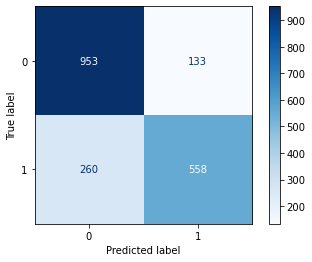

The Accurracy score is 0.7935924369747899
The Sensitivity score is 0.6821515892420538
The Precision score is 0.8075253256150506
____________________
Receiver Operating Characteristic (ROC) curve:


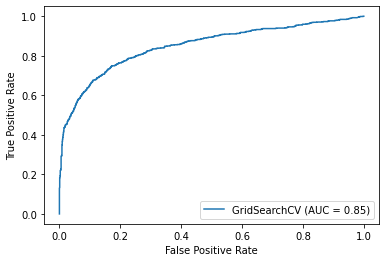

'Model scored!'

In [19]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Term Frequency Vectorizer, Naive Bayes

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   11.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   27.1s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   44.2s finished


The best parameters are: {'tvec__max_df': 0.7, 'tvec__max_features': 10000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

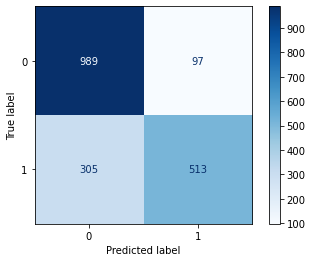

The Accurracy score is 0.7888655462184874
The Sensitivity score is 0.6271393643031785
The Precision score is 0.840983606557377
____________________
Receiver Operating Characteristic (ROC) curve:


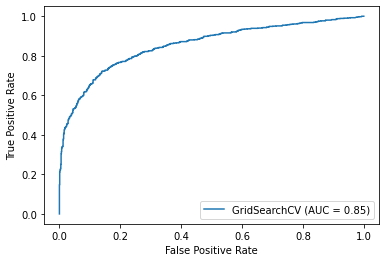

'Model scored!'

In [20]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'tvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Count Vectorizer, Logistic Regression

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   16.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   38.6s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:  1.1min finished


The best parameters are: {'cvec__max_df': 0.7, 'cvec__max_features': 10000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

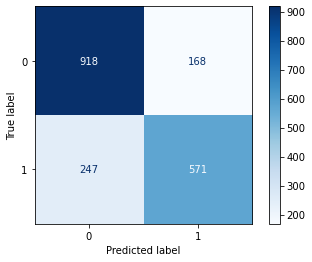

The Accurracy score is 0.7820378151260504
The Sensitivity score is 0.6980440097799511
The Precision score is 0.7726657645466847
____________________
Receiver Operating Characteristic (ROC) curve:


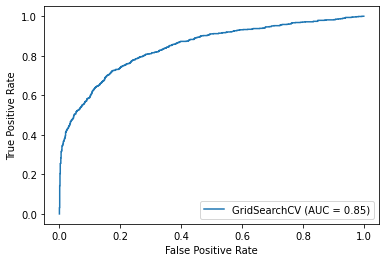

'Model scored!'

In [21]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'logreg'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Count Vectorizer, Random Forest

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   23.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:  6.7min finished


The best parameters are: {'tvec__max_df': 0.5, 'tvec__max_features': 12000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

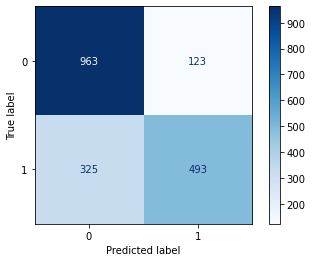

The Accurracy score is 0.7647058823529411
The Sensitivity score is 0.6026894865525673
The Precision score is 0.8003246753246753
____________________
Receiver Operating Characteristic (ROC) curve:


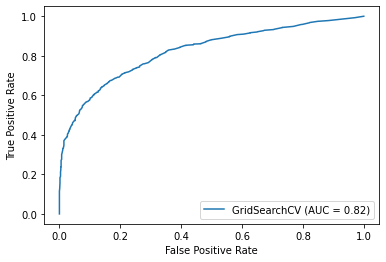

'Model scored!'

In [22]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'tvec' #count vectorizer
classifier = 'rf'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

The CVEC / NB model seemed to perform best so I'm going to see if I can tune the hyperparemeters to improve the accuracy score.  

As a reminder, these were the best parameters as selected by the grid search:  

The best parameters are: {'cvec__max_df': 0.5, 'cvec__max_features': 10000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': sword list}
The best training score was: 0.7980382526158423
The test score is: 0.7935924369747899

changes for this run:  
- max feats running from 2k to 12k (previous best was 10k)
- mindf 2,3,4
- max df .25, .3, .4, .5 (previou best .5)
- ngrams (1,1), (1,2), (1,3)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   10.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   22.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   41.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 2160 out of 2160 | elapsed:  1.9min finished


The best parameters are: {'cvec__max_df': 0.25, 'cvec__max_features': 4000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
The best training score was: 0.7985651815548778
The test score is: 0.803046218487395
____________________
Confusion Matrix for Test Set:


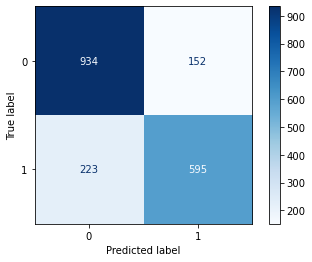

The Accurracy score is 0.803046218487395
The Sensitivity score is 0.7273838630806846
The Precision score is 0.7965194109772423
____________________
Receiver Operating Characteristic (ROC) curve:


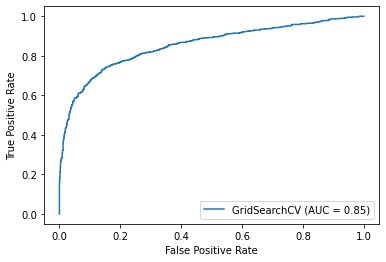

'Model scored!'

In [23]:
nltk_slist = stopwords.words('english')
maxfeats = [2_000, 4_000, 6_000, 8_000, 10_000, 12_000] #try different volume of features
mindf = [2, 3, 4] #minimum word frequency to be included in the model
maxdf = [.25, .3, .4, .5] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,1), (1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

new adjustments:  
- maxfeats 1k, 1.5k, 2k, 2.5k, 3k, 3.5k, 4k, 4.5k

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   11.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   24.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   43.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 2880 out of 2880 | elapsed:  2.5min finished


The best parameters are: {'cvec__max_df': 0.25, 'cvec__max_features': 3500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
The best training score was: 0.7985651815548778
The test score is: 0.8019957983193278
____________________
Confusion Matrix for Test Set:


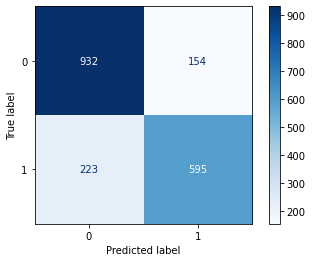

The Accurracy score is 0.8019957983193278
The Sensitivity score is 0.7273838630806846
The Precision score is 0.794392523364486
____________________
Receiver Operating Characteristic (ROC) curve:


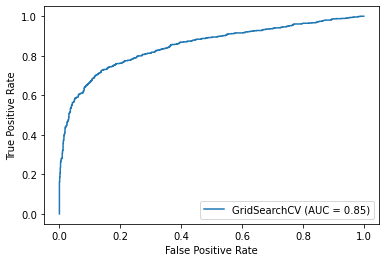

'Model scored!'

In [24]:
nltk_slist = stopwords.words('english')
maxfeats = [1_000, 1_500, 2_000, 2_500, 3_000, 3_500, 4_000, 4_500] #try different volume of features
mindf = [2, 3, 4] #minimum word frequency to be included in the model
maxdf = [.25, .3, .4, .5] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,1), (1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

Adjustments:  
- maxdf .1, .15, .20, .25, .3, .4
- mindf 1,2,3,4

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   10.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   21.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   38.9s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   60.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 4320 out of 4320 | elapsed:  3.3min finished


The best parameters are: {'cvec__max_df': 0.4, 'cvec__max_features': 3500, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
The best training score was: 0.7989151372732003
The test score is: 0.8025210084033614
____________________
Confusion Matrix for Test Set:


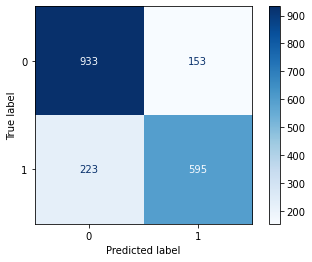

The Accurracy score is 0.8025210084033614
The Sensitivity score is 0.7273838630806846
The Precision score is 0.7954545454545454
____________________
Receiver Operating Characteristic (ROC) curve:


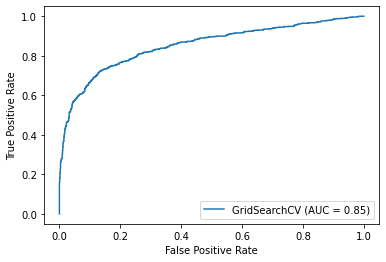

'Model scored!'

In [25]:
nltk_slist = stopwords.words('english')
maxfeats = [1_000, 1_500, 2_000, 2_500, 3_000, 3_500, 4_000, 4_500] #try different volume of features
mindf = [1, 2, 3] #minimum word frequency to be included in the model
maxdf = [.1, .15, .2, .25, .3, .4] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,1), (1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)